# Первая лабораторная

Лабораторная состоит из гайда по работе с изображениями и видео на Python и пяти заданий:
* [Задание 1](#Задание-1.) - подбор двух изображений;
* [Задание 2](#Задание-2.) - нахождение параметра детектора границ;
* [Задание 3](#Задание-3.) - поиск разделяющего правила;
* [Задание 4](#Задание-4.) - обычная бинаризация;
* [Задание 5](#Задание-5.) - локальная бинаризация.

Сначала рекомендуется ознакомиться с гайдом, после чего выполнять задания.

## 0. Jupyter

Jupyter - интерактивная среда, позволяющая хранить код, текст, графику и результаты выполнения кода в одном месте - ноутбуке.

Ноутбук разбит на ячейки двух типов: `Markdown` - для текста, и `Code` - с кодом и результатом выполнения, в т.ч. с графиками. Чтобы запустить код в определённой ячейке, её нужно выделить и нажать `Run` (Shift+Enter). Если изменить код ячейки, но не перезапустить её, результат не изменится.

В ячейках с кодом можно использовать язык Python с расширениями. Команда вызова расширения как правило начинается с `%`.
Также встроенным редактором кода поддерживается автодополнение по клавише `Tab`.

Для вывода графики будем использовать `matplotlib`. Подключим его, попутно измерив время подключения пакета:

In [3]:
%%time
from matplotlib import pyplot as plt

Wall time: 0 ns


Все графики matplotlib будут выводиться под кодом. Например, вот пример кода для вывода графика $f(x)=x^2$:

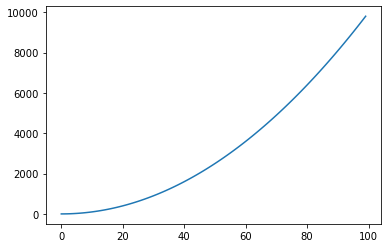

In [4]:
plt.plot(range(100), [i ** 2 for i in range(100)])

## 1. NumPy
NumPy - пакет, позволяющий хранить / выполнять быстрые операции над матрицами и тензорами в Python, решать системы линейных уравнений, находить псевдообратные матрицы и т.п.

In [6]:
import numpy as np

### Работа с многомерными массивами

Массив в NumPy характеризуется:
* типом значений (dtype);
* числом осей (ndim);
* размерностью (shape) - то есть числом элементов по каждой оси.

Важно, что массивы в NumPy (объекты numpy.ndarray) обычно лежат в памяти линейно.

Массивы можно создавать из списков (python list).

Также, есть методы для создания пустых, единичных, заполненных константой матриц и др.

Например, создание матрицы *3x5*, заполненной единицами, выглядит следующим образом:

In [7]:
a = np.ones((3, 5))

Где `(3, 5)` (скобки обязательны) - кортеж (python tuple) с количествами элементов по осям.

In [8]:
print(f"Тип значений: {a.dtype}, число осей: {a.ndim}, размерности: {a.shape}")
print(a)

Тип значений: float64, число осей: 2, размерности: (3, 5)
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


Доступ к элементам массива осуществляется следующим образом:

In [9]:
print(f"Первый элемент первой строки: {a[0, 0]}")
print(f"Весь второй столбец: {a[:, 1]}")

Первый элемент первой строки: 1.0
Весь второй столбец: [1. 1. 1.]


Также можно изменять элементы, например:

In [10]:
a[:, 1] = [2, 3, 4]
print(a)

[[1. 2. 1. 1. 1.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]


Размерности массива можно менять, при этом память под новый массив не выделяется:

In [11]:
b = a.reshape((5, 3))
b[1, 1] = 0
print(b)

[[1. 2. 1.]
 [1. 0. 1.]
 [3. 1. 1.]
 [1. 1. 4.]
 [1. 1. 1.]]


Был изменён элемент матрицы `b`, но `a` тоже поменялась:

In [12]:
print(a)

[[1. 2. 1. 1. 0.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]


Чтобы избежать такого эффекта можно создать *глубокую* копию:

In [13]:
c = a.copy()
c[0, 4] = 1

In [14]:
print(a)
print(c)

[[1. 2. 1. 1. 0.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]
[[1. 2. 1. 1. 1.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]


Заметим, что поменялась только матрица **c**.

Существует также метод намеренного создания наоборот *слабой* копии: `view()`, чтобы избегать лишнего копирования данных, когда такое поведение допустимо.

При работе с матрицами больших размеров нужно стараться применять методы NumPy,
вместо написания своих циклов обработки на Python, поскольку, как правило, время работы готовых методов
в разы меньше, а код более выразительный. Так, например, искать индексы истинных (True) элементов матрицы можно с помощью `np.where`,
извлекать диагональ матрицы – с помощью `np.diag`, и т.д.
Список доступных методов можно посмотреть в [документации](https://docs.scipy.org/doc/numpy/reference/).

Важно, что произведение матриц по умолчанию выполняется **поэлементно**. Если размерности матриц совпадают лишь частично, применяются правила [трансляции (broadcasting)](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html):

In [15]:
A = np.array([[1, 2], [3, 4]])
x = np.array([5, 6]).reshape((1, 2))

print("A:\n", A)
print("x:\n", x, "\n")
print("A * x:\n", A * x, "\n")
print("x^T:\n", x.T, "\n")
print("A * x^T:\n", A * x.T)

A:
 [[1 2]
 [3 4]]
x:
 [[5 6]] 

A * x:
 [[ 5 12]
 [15 24]] 

x^T:
 [[5]
 [6]] 

A * x^T:
 [[ 5 10]
 [18 24]]


В первом случае `x` имеет размерность `(1, 2)` и рассматривается как строка. Поскольку размерности матрицы `A` и `x` не совпадают, и одна из размерностей `x` равна `1`, то результат `A * x` – поэлементное произведение каждой строки `A` на строку `x`.

Если умножить `A` на матрицу-столбец `x.T`, имеющую размерность `(2, 1)`, то результат `A * x` – поэлементное произведение каждого столбца `A` на столбец `x.T`.

Когда требуется использовать матричное произведение, применяют метод `dot` или оператор 'at' `@`:

In [16]:
print("x `dot` A:\n", x.dot(A), "\n")
print("A `dot` x.T:\n", A.dot(x.T))
print("A @ x.T:\n", A @ x.T)

x `dot` A:
 [[23 34]] 

A `dot` x.T:
 [[17]
 [39]]
A @ x.T:
 [[17]
 [39]]


Освежить знания по Python, а также узнать более подробно про NumPy и MatPlotLib можно [здесь](http://cs231n.github.io/python-numpy-tutorial/).

## 2. Работа с изображениями

Установим библиотеку `imageio`:

In [80]:
!pip install imageio

Загрузим изображение с помощью библиотеки `imageio`:

In [106]:
from imageio import imread, imsave
kitten = imread("kitten.jpg")

Изображения представляются массивами numpy с размерностью `(высота, ширина, число каналов)`, где каналы - как правило компоненты RGB.

Убедимся в этом, взгялув на размерность загруженного изображения:

In [107]:
print(kitten.shape)

(150, 150, 3)


Для вывода изображения воспользуемся matplotlib:

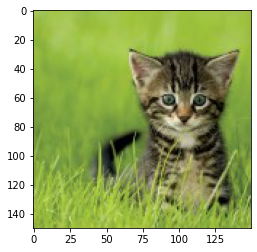

In [108]:
plt.imshow(kitten)

### Размерности изображений

Часто возникает проблема, когда изображение хранится в "сыром" виде с неправильным порядком каналов, например не `(высота, ширина, число каналов)`, а `(число каналов, высота, ширина)`.

Такая же проблема часто появляется при обработке изображений с помощью библиотек глубокого обучения: в Theano каналы идут до высоты, в Tensorflow - после ширины. Соответственно, может возникнуть задача переводить одно представление в другое.

Рассмотрим пример: дан numpy массив `data`, содержащий изображение, в котором каналы располагаются по горизонтали.

(150, 450)


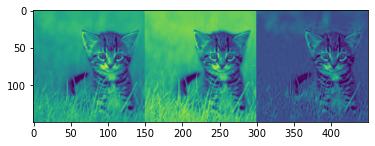

In [84]:
data = np.load("shaped_incorrectly.npy")
print(data.shape)
plt.imshow(data)

In [24]:
result = data.reshape((150, 3, 150)) # резрежем изображение на три квадрата по горизонтали
result = np.dstack([result[:, i, :] for i in range(3)]) # составим из трёх изображений (150, 150) одно (150, 150, 3)

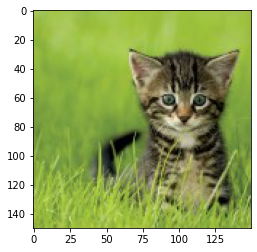

In [85]:
plt.imshow(result)

Поскольку задача типичная, существует более традиционый метод переставить оси `(150, 3, 150) -> (150, 150, 3)`: `np.swapaxes(result, -1, 1)`

### Пример задачи поиска описывающего прямоугольника

Рассмотрим простую задачу. Пусть дано изображение тёмного котёнка на фоне зелёной травы. Требуется найти описывающий прямоугольник (такой, чтобы весь котёнок оказался внутри).

Посмотрим на значения каналов:

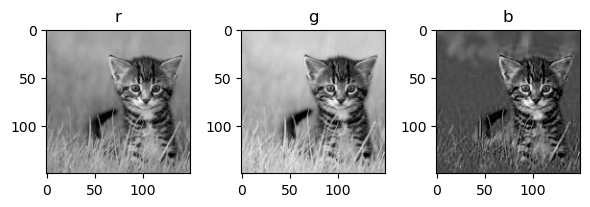

In [109]:
f, ax = plt.subplots(1, 3) # создадим сетку, в которую будем выводить картинки
f.set_dpi(100)             # повысим чёткость изображений
for i in range(3):
    ax[i].set_title("rgb"[i])                 # поставим подпись, соответствующую номеру канала
    ax[i].imshow(kitten[..., i], cmap="gray") # выведем значение канала с чёрно-белой цветовой схемой
f.tight_layout() # добавим границы, чтобы графики не наезжали друг на друга

Заметим, что синий канал самый тусклый, а зелёный ярче красного почти только на траве.

Значит для пикселей вокруг котёнка выполнено: $g > r$. Тогда пикселям котёнка соответствует обратное неравенство.

Проверим это:

Результат - матрица типа bool


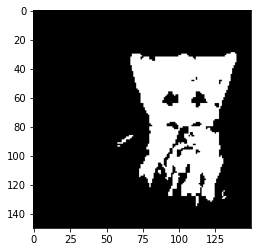

In [110]:
r = kitten[..., 0] # берём все значения по высоте и ширине, фиксируя только номер канала. Равносильно kitten[:, :, 0]
g = kitten[..., 1]
mask = r > g
plt.imshow(mask, cmap="gray")
print(f"Результат - матрица типа {mask.dtype}")

Переберём все строки чтобы найти верхнюю и нижнюю границы описывающиего прямоугольника:

In [111]:
%%time

top = mask.shape[0]
bottom = 0
for row in range(mask.shape[0]): # проходим по всем строкам
    if mask[row, :].sum() > 0:   # проверяем, что в строке есть хоть один элемент равный true 
        top = min(top, row)
        bottom = max(bottom, row)
print(f"Top: {top}, bottom: {bottom}")

Top: 29, bottom: 134
Wall time: 1.03 ms


Аналогично поступим со столбцами:

In [112]:
%%time

left = mask.shape[1]
right = 0
for col in range(mask.shape[1]): # проходим по всем столбцам
    if mask[:, col].sum() > 0:
        left = min(left, col)
        right = max(right, col)
print(f"Left: {left}, right: {right}")

Left: 58, right: 139
Wall time: 1.99 ms


Отметим, что более правильно в данном случае было бы не использовать циклы Python,
отдав предпочтение `np.where`.
Для этого можно воспользоваться вспомогательным методом `np.any`, позволяющим определить есть ли хотя бы один истинный (True) элемент в строке для каждой строки: `np.any(mask, axis=1)`, и аналогично для столбцов: `np.any(mask, axis=0)`.
Результат работы `np.where` - кортеж (tuple) с массивами индексов истинных (True) элементов. Каждый элемент кортежа соответствует индексам своей оси. Если применять `np.where` к массиву с одной осью (измерением), кортеж будет содержать всего один элемент.

Реализуем более эффективный поиск описывающего прямоугольника с помощью этих операций:

In [113]:
%%time

vertical_indices = np.where(np.any(mask, axis=1))[0]
top, bottom = vertical_indices[0], vertical_indices[-1]

horizontal_indices = np.where(np.any(mask, axis=0))[0]
left, right = horizontal_indices[0], horizontal_indices[-1]

print(f"Top: {top}, bottom: {bottom}")
print(f"Left: {left}, right: {right}")

Top: 29, bottom: 134
Left: 58, right: 139
Wall time: 0 ns


Заметим, что время работы значительно уменьшилось.

Нарисуем описывающий прямоугольник поверх изображения с помощью `matplotlib.patches`:

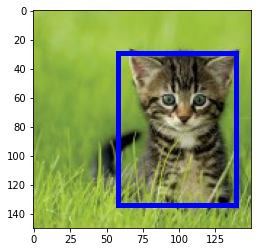

In [114]:
from matplotlib.patches import Rectangle

f, ax = plt.subplots(1, 1)
ax.imshow(kitten)

corner = (left, top)
height = bottom - top
width = right - left
ax.add_patch(Rectangle(corner, width, height, linewidth=5, edgecolor='b', facecolor='none'))

---
### Задание 1.

Дано изображение:

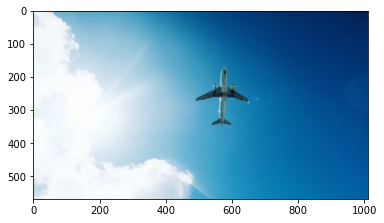

In [32]:
from skimage.color import rgb2gray, rgba2rgb
airplane = imread("airplane.jpg")
plt.imshow(airplane)

Посмотрим гистограммы интенсивностей пикселей внутри двух прямоугольников: с объектом и без него.

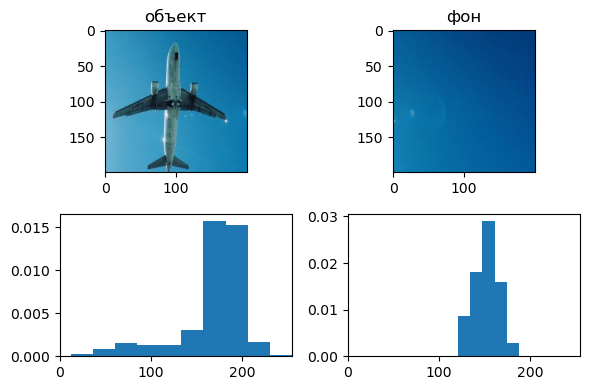

In [33]:
f, ax = plt.subplots(2, 2)  # создадим сетку, в которую будем выводить картинки
f.set_dpi(100)              # повысим чёткость изображений

airplane_object     = airplane[150:350, 480:680]
airplane_background = airplane[150:350, 650:850]

ax[0, 0].set_title("объект")
ax[0, 1].set_title("фон")
ax[0, 0].imshow(airplane_object, cmap="gray")
ax[0, 1].imshow(airplane_background, cmap="gray")
# выведем гистограмму синего канала куска изображения с объектом
ax[1, 0].hist(airplane_object[..., 2].ravel(), density=True)  # `density=True` - нормировка
ax[1, 1].hist(airplane_background[..., 2].ravel(), density=True)
for a in ax[1]: a.set_xlim([0, 255])

f.tight_layout()  # добавим границы, чтобы графики не наезжали друг на друга

*В коде `ravel` (англ. "запутывать") склеивает все размерности в одну. В данном случае `(150, 150) -> (22500,)`*

**Задача: подобрать два изображения, на которых объект:**
* имеет гистограмму, аналогичную гистограмме фона, ответ сохранить в файл `hist_same_comparison.png`;
* имеет гистограмму, сильно отличающуюся от фона, ответ сохранить в файл `hist_different_comparison.png`.

*Изображения надо поместить в папку с ноутбуком.*

Гистограммы близки:

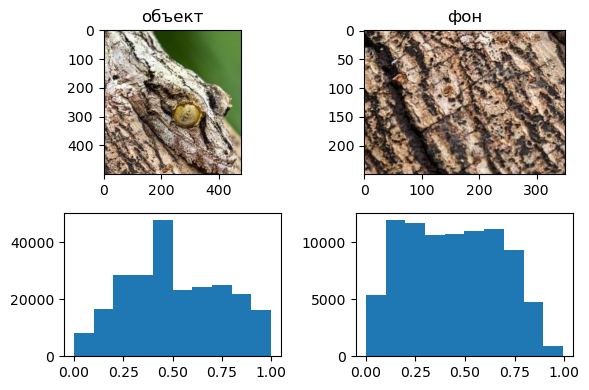

In [117]:
first_img = imread("chameleon.png")
f, ax = plt.subplots(2, 2)
f.set_dpi(100)

first_object     = first_img[0:500, 200:680]  # координаты можно менять
first_background = first_img[300:600, 0:350]  # координаты можно менять

ax[0, 0].set_title("объект")
ax[0, 1].set_title("фон")
ax[0, 0].imshow(first_object, cmap="gray")
ax[0, 1].imshow(first_background, cmap="gray")
ax[1, 0].hist(rgb2gray(first_object).flatten())
ax[1, 1].hist(rgb2gray(first_background).flatten())

f.tight_layout()
plt.savefig("hist_same_comparison.png", dpi=100)

Гистограммы различны:

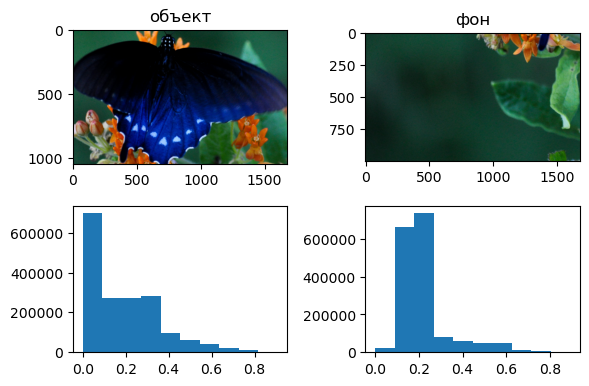

In [115]:
second_img = imread("butterfly.png")
f, ax = plt.subplots(2, 2)
f.set_dpi(100)

second_object     = second_img[500:1550, 700:2380]  # координаты можно менять
second_background = second_img[1550:2550, 0:1680]  # координаты можно менять

ax[0, 0].set_title("объект")
ax[0, 1].set_title("фон")
ax[0, 0].imshow(second_object, cmap="gray")
ax[0, 1].imshow(second_background, cmap="gray")
ax[1, 0].hist(rgb2gray(second_object).flatten())
ax[1, 1].hist(rgb2gray(second_background).flatten())

f.tight_layout()
plt.savefig("hist_different_comparison.png", dpi=100)

---

### Задание 2.

Установим библиотеку `scikit-image`, включающую `skimage.feature` и `skimage.filters`:

In [ ]:
!pip install -U scikit-image

Ниже приведён пример поиска границ для изображения `lena`.

Требуется подобрать параметр `sigma` так, чтобы границы начали выделяться адекватно (должны получаться длинные непрерывные кривые).

При желании можно менять другие параметры, но необходимо следить за тем, чтобы результат сохранился в файл `lena_edges.png`.

Дополнительно можно посмотреть доступные фильтры в [skimage.filters](http://scikit-image.org/docs/dev/api/skimage.filters.html)

In [ ]:
from skimage.feature import canny
from skimage.filters import sobel, gaussian

lena = imread("lena.png")

lena_gray = rgb2gray(rgba2rgb(lena))
lena_gray_blur = gaussian(lena_gray, 3)
lena_edges = canny(lena_gray, sigma=0.1, low_threshold=0.05)

f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title("Lena")
ax[1].set_title("Edges")
ax[0].imshow(lena)
ax[1].imshow(lena_edges, cmap="gray")

plt.savefig("lena_edges.png", dpi=200)

---

## 3. Работа с видео

Установим библиотеку opencv:

In [ ]:
!pip install -U opencv-contrib-python-headless==4.5.2.54

*Обратите внимание, что библиотека OpenCV по умолчанию не включает contrib-модули, содержащие большое число различных алгоритмов. В [репозитории](https://pypi.org/project/opencv-python/) есть готовые сборки, вроде `opencv-contrib-python`. Но ставить можно только **один** из пакетов, иначе могут возникать ошибки. Также, мы установили headless-версию, поскольку не планируем использовать GUI.*

В случае, если количество кадров велико, лучше производить обработку кадров сразу после загрузки.
Однако в данном случае кадров всего 249, поэтому загрузим все кадры видео в список:

In [ ]:
%%time
import cv2

cap = cv2.VideoCapture("./poly_pin.mp4")

frames_list = []
cur_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
while True:
    ready, frame = cap.read()
    if ready:
        downsampled = cv2.resize(frame, (0,0), fx=0.25, fy=0.25)
        frames_list.append(downsampled)
        cur_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
    else: # не удалось загрузить кадр
        cap.set(cv2.CAP_PROP_POS_FRAMES, cur_frame - 1)

    if cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        print(f"Все кадры загружены ({len(frames_list)} кадров)")
        break

Преобразуем кадры в массив `NumPy`:

In [ ]:
%%time

frames = np.stack(frames_list, axis=0)

Выведем первый и последний кадры:

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(frames[0])
ax[1].imshow(frames[-1])
ax[0].set_title("Первый кадр")
ax[1].set_title("Последний кадр");

Попробуем отследить положение значка на видео:

In [ ]:
# Задаём начальное положение значка
x, y, w, h = 500 // 4, 300 // 4, 400 // 4, 400 // 4
bbox = (x, y, w, h)

frames_with_boxes = frames.copy()

# Создаём трекер
tracker = cv2.TrackerMIL_create() # The Tracker uses an algorithm which trains a classifier to separate the object from the background
tracker.init(frames[0], bbox)
# Рисуем красный описывающий прямоугольник на изображении
cv2.rectangle(
    frames_with_boxes[0],
    (x, y),  # левый верхний угол
    (x + w, y + h),  # правый нижний угол
    (255, 0, 0),  # цвет
    20  # толщина линии
)

for frame_num, frame in enumerate(frames[1:], 1):
    (success, new_bbox) = tracker.update(frame)
    int_bbox = [int(i) for i in new_bbox]
    (nx, ny, nw, nh) = int_bbox
    cv2.rectangle(frames_with_boxes[frame_num], (nx, ny), (nx + nw, ny + nh), (255,0,0), 20)

Посмотрим на несколько кадров:

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
for i, f_num in enumerate([0, 150, -1]):
    ax[i].imshow(frames_with_boxes[f_num])

Понизим разрешение изображений, чтобы отобразить анимацию в ноутбуке:

In [ ]:
downsampled = []
ds = 4  # downsampling factor

for frame in frames_with_boxes:
    downsampled.append(cv2.resize(frame, (frame.shape[1] // ds, frame.shape[0] // ds)))

*Если вы запускаете код в `Jupyter Lab`, то режим `notebook` ниже будет недоступен и могут вознинкуть проблемы с отображением анимации (их можно проигнорировать и перейти к следующей части).*

In [ ]:
%matplotlib notebook
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()
l = ax.imshow(downsampled[0])

def animate(i):
    l.set_data(downsampled[i])

ani = animation.FuncAnimation(fig, animate, frames=100) # len(frames)

HTML(ani.to_jshtml())

## 4. Работа с табличными данными: Pandas

Pandas - популярный пакет для анализа данных. С помощью него можно загружать датасеты различных форматов, производить отбор признаков, быстро строить графики по подмножествам данных и т.п.

Основных сущностей в Pandas две:
* DataFrame - таблица, включающая информацию о типе и названии каждого столбца, вместе с данными;
* Series - последовательность значений, например, значения столбца таблицы.

Подключим Pandas и загрузим датасет "Titanic":

In [ ]:
import pandas as pd

titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.head()  # выведем заголовки столбцов и первые 5 строк

Видно, что данные неправильно разбились на столбцы. Чтобы это исправить поменяем разделитель:

In [ ]:
titanic = pd.read_csv("titanic.csv", delimiter="\t")
titanic.head()

In [ ]:
titanic.describe()

Из описания видно, что `PassengerId` - просто номер строки, который можно исключить, а `Pclass` - категориальная переменная. Избавимся от столбца `PassengerId`:

In [ ]:
titanic = titanic.drop(columns=["PassengerId"])

Посмотрим на гистограмму классов (`Pclass`):

In [ ]:
%matplotlib inline
titanic.groupby(titanic['Pclass']).Pclass.count().plot(kind='bar')

Попробуем найти правило, по которому можно определить принадлежит ли строка "выжившим".

Взглянем на гистограммы возраста "выживших" (тех, у кого `Survived = 1`) и не "выживших":

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Survived")
titanic[titanic.Survived == 1].Age.hist(ax=ax1, range=(0, 60))
titanic[titanic.Survived == 0].Age.hist(ax=ax2, range=(0, 60))

Поскольку гистограммы различны, скорее всего получится научиться отделять "выживших" от не "выживших".

Выберем все строки с возрастом от 20 до 60 - для этого воспользуемся методом `query`, и посмотрим отдельно на гистограммы возраста и "выживаемости" для мужчин:

In [ ]:
titanic_middle_age = titanic.query("Age > 20 and Age < 60")

In [ ]:
titanic_middle_age_male = titanic_middle_age.query("Sex == 'male'")
titanic_middle_age_male.query("Survived == 1").hist(column=["Age", "SibSp"])
plt.tight_layout()

In [ ]:
titanic_middle_age_male.query("Survived == 0").hist(column=["Age", "SibSp"])
plt.tight_layout()

Из этих гистограмм можно "на глаз" оценить множество почти точно "не выживших":

In [ ]:
titanic_middle_age_male.query("Age > 34 or SibSp > 0.1").Survived.hist()

---
### Задание 3.

Найдите аналогичный простой запрос (`query`), для заданного датафрейма `titanic_middle_age_female`, разделяющий множество по критерию `Survived` на два подмножества: "точно не выжившие" и "возможно выжившие", или наоборот.

_Пояснение_: в множестве "точно не выживших" должны попасть только те объекты, для которых `Survived == 1`. В множество "возможно выживших" попадают все остальные объекты, у них может быть как `Survived == 0`, так и `Survived == 1`.

**Гистограмма с результатом применения вашего запроса должна быть сохранена в файл `titanic_survival.png`.**

In [ ]:
titanic_middle_age_female = titanic_middle_age.query("Sex == 'female'")
titanic_middle_age_female.query("Survived == 1").hist(column=["Age", "SibSp"])
plt.tight_layout()

In [ ]:
titanic_middle_age_female.query("SibSp > 0").Survived.hist()
plt.savefig("titanic_survival.png")

---

## 4. Бинаризация

In [ ]:
from skimage.filters import try_all_threshold

img = imread('./horse.jpg')
fig, ax = try_all_threshold(rgb2gray(img), figsize=(15, 15), verbose=False)
plt.show()

Посмотрим как можно улучшить результат с помощью предобработки:

In [ ]:
from skimage.filters import gaussian

img_blur = gaussian(img, sigma=1.5, multichannel=True)

fig, ax = try_all_threshold(rgb2gray(img_blur), figsize=(15, 15), verbose=False)
plt.show()

Рассмотрим результат бинаризации Оцу:

In [ ]:
from skimage.filters import threshold_otsu

img_blur_gray = rgb2gray(img_blur)
thresh_otsu = threshold_otsu(img_blur_gray)
res_otsu = img_blur_gray <= thresh_otsu

plt.imshow(res_otsu, cmap='gray')
plt.axis('off')

Видно, что в целом результат неплохой, но справа от объекта осталось несколько мелких пятен.

Посмотрим как можно избавиться от этих пятен:

Нужные морфологические операции реализованы в библиотеке [skimage.morphology](http://scikit-image.org/docs/dev/api/skimage.morphology.html). Подключим их

In [ ]:
from skimage.morphology import binary_opening

res_otsu_enclosed = binary_opening(res_otsu, selem=np.ones((5, 5)))

plt.imshow(res_otsu_enclosed, cmap='gray')
plt.axis('off')

От части пятен удалось избавиться. При этом видно, что вблизи гривы маска стала значительно более гладкой, из-за применения `binary_opening`.

*Если бы внутри объекта были дырки, их можно было бы закрасить по аналогии, используя метод* `binary_closing(img) = binary_erosion(binary_dilation(img))`.

Проведём анализ компонент связности на маске:

In [ ]:
from skimage.measure import regionprops
from skimage.measure import label as sk_measure_label # импортировать под другим именем, чтобы не терять, если появляется переменная label

def get_largest_component(mask):
    labels = sk_measure_label(mask) # разбиение маски на компоненты связности
    props = regionprops(labels) # нахождение свойств каждой области (положение центра, площадь, bbox, интервал интенсивностей и т.д.)
    areas = [prop.area for prop in props] # нас интересуют площади компонент связности

    print("Значения площади для каждой компоненты связности: {}".format(areas))
    largest_comp_id = np.array(areas).argmax() # находим номер компоненты с максимальной площадью

    print("labels - матрица, заполненная индексами компонент связности со значениями из множества: {}".format(np.unique(labels)))
    return labels == (largest_comp_id + 1) # области нумеруются с 1, поэтому надо прибавить 1 к индексу

plt.imshow(get_largest_component(res_otsu_enclosed), cmap='gray')
plt.axis('off')

---
### Задание 4.

Подберите изображение, на котором объект достаточно чётко отделим от фона. Выделите на нём объект при помощи бинаризации, морфологических операций и анализа компонент связности, по аналогии с примером выше.

In [ ]:
first_image = imread('<your image>')
# Ваш код

Сохраните результат (маску объекта) в файл `task_4.png`.

---

**Локальные методы**

В случае, если объект отчётливо виден, но на изображении неравномерное освещение, полезны локальные методы.

Ниже приведены изображения, содержащие локальные пороговые значения:

In [ ]:
from skimage.data import page
from skimage.filters import threshold_local

page_img = page()

fig, ax = plt.subplots(1, 4, figsize=(15, 6))
ax[0].imshow(page_img, cmap='gray')
ax[1].imshow(threshold_local(page_img, 31, method='mean'), cmap='gray')
ax[2].imshow(threshold_local(page_img, 31, method='gaussian'), cmap='gray')
ax[3].imshow(threshold_local(page_img, 31, method='median'), cmap='gray')
for i in range(4): ax[i].set_axis_off()

for i, title in enumerate(["Input", "Mean", "Gaussian", "Median"]): ax[i].set_title(title)

Как видно, локальные пороговые значения состовляют что-то вроде карты освещения. Эту карту можно можно использовать для бинаризации. *Аналогичная идея используется и просто для выравнивания освещения (Single-Scale Retinex) на изображении.*

Выделим объекты с помощью полученных локальных пороговых значений:

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 6))
ax[0].imshow(page_img >= threshold_otsu(page_img), cmap='gray')
ax[1].imshow(page_img >= threshold_local(page_img, 31, method='mean'), cmap='gray')
ax[2].imshow(page_img >= threshold_local(page_img, 31, method='gaussian'), cmap='gray')
ax[3].imshow(page_img >= threshold_local(page_img, 31, method='median'), cmap='gray')
for i in range(4): ax[i].set_axis_off()

for i, title in enumerate(["Otsu", "Local: Mean", "Local: Gaussian", "Local: Median"]): ax[i].set_title(title)

---
### Задание 5.

Подберите изображение, на котором обычная бинаризация даёт плохие результаты, когда как локальная позволяет получить результаты гораздо лучше. Найдите наиболее подходящие параметры метода `threshold_local`.

In [ ]:
img_local = imread('<your image>')

fig, ax = plt.subplots(1, 4, figsize=(15, 6))
ax[0].imshow(img_local >= threshold_otsu(img_local), cmap='gray')
ax[1].imshow(img_local >= threshold_local(img_local, 31, method='mean'), cmap='gray')
ax[2].imshow(img_local >= threshold_local(img_local, 31, method='gaussian'), cmap='gray')
ax[3].imshow(img_local >= threshold_local(img_local, 31, method='median'), cmap='gray')

for i, title in enumerate(["Otsu", "Local: Mean", "Local: Gaussian", "Local: Median"]): ax[i].set_title(title)

plt.savefig('task_5.png', dpi=150)  # сохраните результат в файл 'task_5.png'!

Сохраните результат в файл `task_5.png`.

---